<a href="https://colab.research.google.com/github/Deffo0/College_assignments/blob/main/Statistics_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Lab1

## Imports

In [114]:
import matplotlib.pyplot as plt #Python 2D plotting library
from scipy.stats import norm #Python package for distributions
import numpy as np #Python package for powerful N-dimensional array operations
import random

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)


## Distribution Operations

In [59]:
def generate_data(x_min , x_max , num ):
    """
    generates evenly spaced numbers over a specified interval

    Parameters:
    x_min (float): the starting point of the sequence
    x_max (float): the end point of the sequence
    num (int): the number of points to be generated

    Returns:
    x (array-like): equally spaced numbers

    """
    #use this function "linespace" to get certain num of points between min and max and store it in an arrays
    x =  np.linspace(x_min,x_max,num )
    return x

In [60]:
def compute_mean_std(x):
    """
    Computes the approximate mean and standard deviation of an array of normally distributed numbers

    Parameters:
    x (array-like): the array of numbers

    Returns:
    mean (float): the mean of the array
    std (float): the standard deviation of the array
    """
    #compute mean and variance for a random dist numbers using numpy 
    mean = np.mean(x)
    std = np.std(x)
    return mean, std

In [61]:
def get_normal_pdf(x, mean, std):
    """
    generates the normal pdf for the range x

    Parameters:
    x (array-like): the range of x axis
    mean (float): the mean of the normal distribution
    std (float): the standard deviation of the normal distribution

    Returns:
    y (array-like): the normal pdf of numbers in x

    """
    #declare a function to get the prpbability denisty function for an array of numbers
    def normal(x,mean,std):
        return ( 2.*np.pi*std**2. )**-.5 * np.exp( -.5 * (x-mean)**2. / std**2. )

    y = normal(x,mean,std)
    return y

In [62]:
def standardize(y):
    """
    Standardize the given normally distributed array

    Parameters:
    y (array-like): Array of normally distributed values

    Returns:
    z (array-like): the standard version of the input array

    """
    #apply the central limit theorem on a normal distrbution
    mean, std = compute_mean_std(y)
    for i in range(0, len(y),1) :
        y[i] = (y[i] - mean)/std
    
    z = y 
    return z

## Normal Distribution Plot

It's required to implement a function that plots normal distribution for a given array of numbers distributed over a given range.

Please, follow the following signature:

In [100]:
def plot_normal(x, y = None):#, xlim_min = -1.0, xlim_max = 1.0, ylim_min = 0, ylim_max = 1.0):
    """
    Plots the pdf of the normal (Gaussian) distribution
    Parameters:
    x (array-like): the data points to be plotted
    xlim_min (float): the lower bound of x axis
    xlim_max (float): the upper bound of x axis
    ylim_min (float): the lower bound of y axis
    ylim_max (float): the upper bound of y axis
    """
    if y is None:
        y = get_normal_pdf(x)
    
    #Use plt library to show your plot. You are encouraged to play with plt functions to
    #get a colorful and neat plot
    #For example: plt.xlabel('X')
    plt.plot(x, y, 'r', lw=3, label='frozen pdf')
    plt.show()


## Driver Code

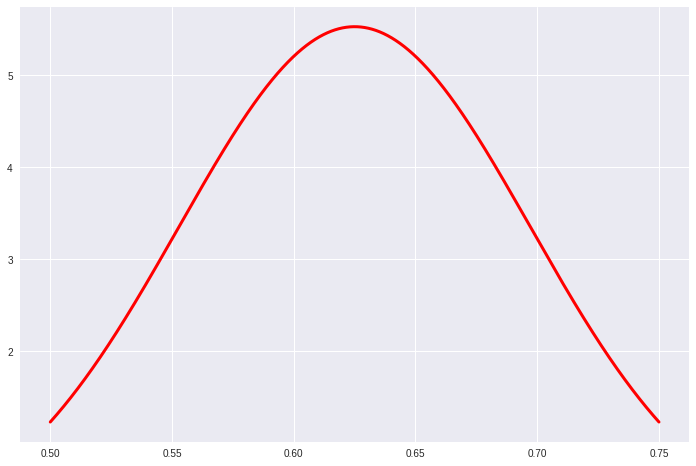

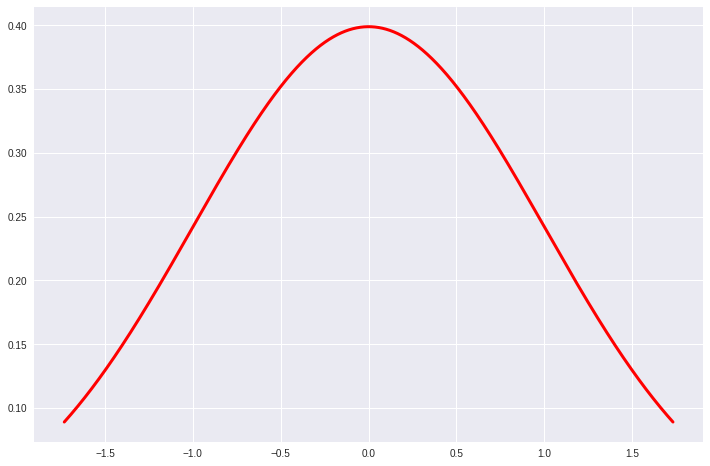

In [91]:
x_min = 0.5
x_max = 0.75

ylim_min = 0.0
ylim_max = 1.0

x = generate_data(x_min, x_max, 100000)

mean, std = compute_mean_std(x)

y = get_normal_pdf(x, mean, std)

plot_normal(x, y)#, x_min, x_max, ylim_min, ylim_max)

z = standardize(x)

x_min = z[0]
x_max = z[len(z) - 1]

new_mean, new_std = compute_mean_std(z)

new_y = get_normal_pdf(z, new_mean, new_std)

plot_normal(z, new_y)#, x_min, x_max, ylim_min, ylim_max)

## Bonus Part

### CDF 

In [198]:
def compute_inverse_cdf(p, mean , std ):
    """
    Computes the inverse of CDF, where P{X <= x} = p

    Parameters:
    p (float): the value of the CDF, where 0 <= p <= 1
    mean a.k.a µ (float): the mean of the normal distribution
    std a.k.a σ (float): the standard deviation of the normal distribution mean

    Returns:
    x (float): the point that satisfies the equation P{X <= x} = p
    """
    #get the inverse for the cdf value
    x = norm.ppf(p,mean,std)
    return x

### CDF Plot

In [271]:
def plot_cdf(x, cdf):
    """
    Plots the cdf of the normal (Gaussian) distribution at a given certain point

    Parameters:
    x (array-like): the data points to be plotted
    cdf: the plot shaded percentage that representins the normal distribution cdf
    """
    x_min = 0.5
    x_max = 0.75
    ylim_min = 0.0
    ylim_max = 1.0
    #make the points array
    x = generate_data(x_min, x_max, 100000)
    #get the mean and the sd
    mean, std = compute_mean_std(x)
    #compute the inverse cdf for the given percentage
    z=compute_inverse_cdf(cdf,mean,std)
    y=get_normal_pdf(x,mean,std)
    #plot the pdf
    plt.plot(x,y,'b',lw=2)
    #shade the cdf area on the pdf of the normal dist for a certain pointS
    plt.fill_between(x,y,0,where= x<z, color = 'y')
    plt.show() 



```
# This is formatted as code
```

### Driver Code

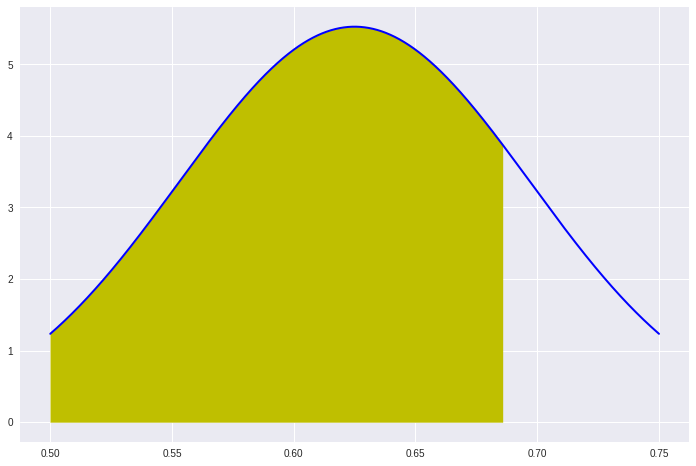

In [272]:
percent = 0.8

plot_cdf(x, percent)